In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')


In [2]:
columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

df=pd.read_csv('heartdisease-data.csv',sep=',', header=None,)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
# Checking the shape of the dataset
df.shape

(200, 14)

In [4]:
# Checking the columns of the dataset
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [5]:
# Checking the datatypes of columns
df.dtypes

0      int64
1      int64
2      int64
3     object
4     object
5     object
6      int64
7     object
8     object
9     object
10    object
11    object
12    object
13     int64
dtype: object

In [6]:
# Checking the unique values
df[3].unique()


array(['140', '130', '132', '142', '110', '120', '150', '180', '160',
       '126', '?', '128', '170', '152', '116', '124', '0', '122', '144',
       '154', '125', '104', '136', '134', '138', '178', '146', '135',
       '158', '106', '112', '102', '96', '172', '155', '156', '118',
       '100', '190', '114', '127'], dtype=object)

In [7]:
#  values of 'goal', showing the presence of heart disease in the patients
df[2].unique()


array([4, 3, 2, 1], dtype=int64)

In [8]:
arr = [3,4,5,7,8,9,10,11,12]


In [9]:
for i in arr:
    df[i].replace('?', 0, inplace=True)
    df[i] = df[i].apply(pd.to_numeric)

In [10]:
df.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9     float64
10      int64
11      int64
12      int64
13      int64
dtype: object

In [11]:
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3.0,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.0,0,0,0,1
196,62,1,1,0,139,0,1,0,0,0.0,0,0,0,0
197,55,1,4,122,223,1,1,100,0,0.0,0,0,6,2
198,58,1,4,0,385,1,2,0,0,0.0,0,0,0,0


In [12]:
df[11].unique()


array([0], dtype=int64)

In [13]:
df.drop(columns=[11], inplace=True)


In [14]:
df.columns


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13], dtype='int64')

In [15]:
df.dtypes


0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9     float64
10      int64
12      int64
13      int64
dtype: object

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    int64  
 1   1       200 non-null    int64  
 2   2       200 non-null    int64  
 3   3       200 non-null    int64  
 4   4       200 non-null    int64  
 5   5       200 non-null    int64  
 6   6       200 non-null    int64  
 7   7       200 non-null    int64  
 8   8       200 non-null    int64  
 9   9       200 non-null    float64
 10  10      200 non-null    int64  
 11  12      200 non-null    int64  
 12  13      200 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 20.4 KB


# Data Visualization


In [17]:
# Checking for null values
df.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
13    0
dtype: int64

In [18]:
df.isna().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
13    0
dtype: int64

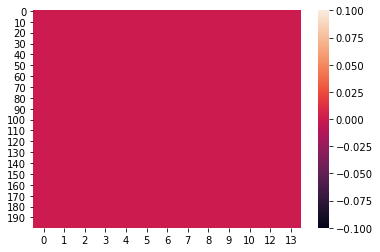

In [19]:
# checking of null values thrugh heatmap
sns.heatmap(df.isnull())


# EDA

In [20]:
df.describe()


,0,1,2,3,4,5,6,7,8,9,10,12,13
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,96.310000,172.490000,0.340000,0.735000,90.25500,0.475000,0.951000,1.045000,1.070000,1.520000
std,7.811697,0.171015,0.795701,62.917781,116.752497,0.474898,0.683455,57.50237,0.500628,1.110344,1.166093,2.427874,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.500000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.50000,0.000000,0.500000,0.000000,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.00000,1.000000,2.000000,2.000000,0.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.00000,1.000000,4.000000,3.000000,7.000000,4.000000


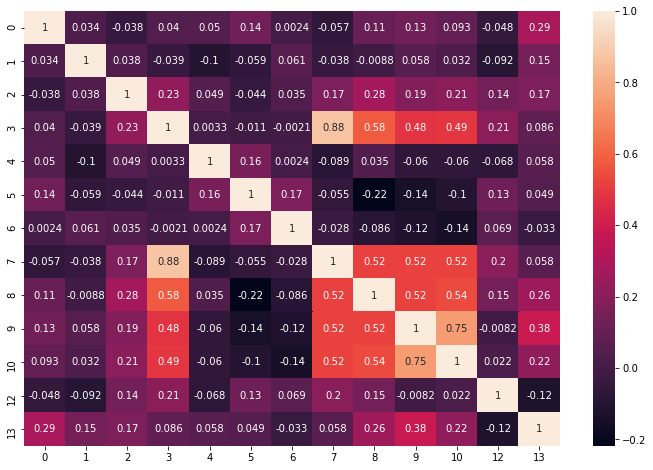

In [21]:
# Corelation through heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

# Outlier detection

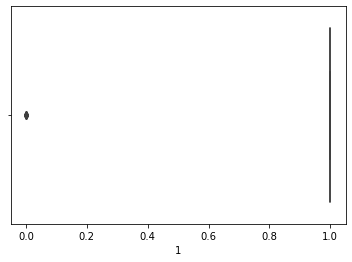

In [22]:
sns.boxplot(df[1])


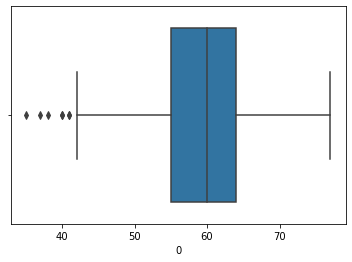

In [23]:
sns.boxplot(df[0])


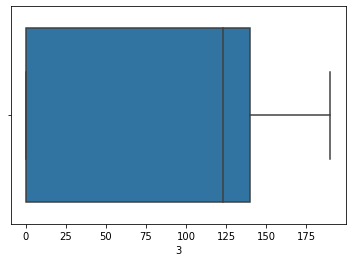

In [24]:
sns.boxplot(df[3])


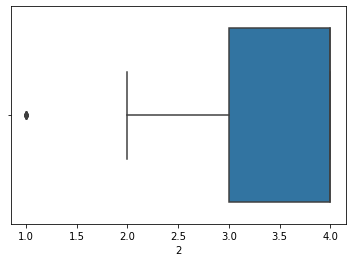

In [25]:
sns.boxplot(df[2])


In [26]:
ncols = 13
nrows = 14


In [27]:
collist = df.columns.values
collist

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13], dtype=int64)

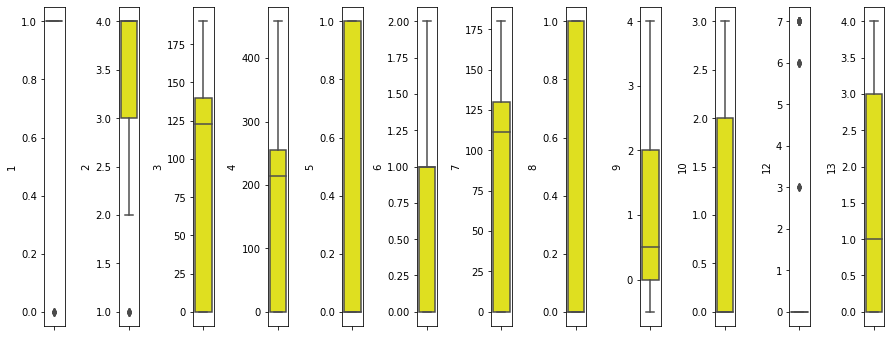

In [28]:
plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(df[collist[i]], color='yellow', orient='v')
    plt.tight_layout()


# Checking skewness

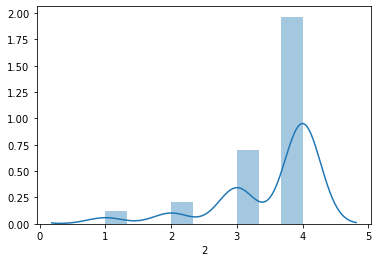

In [29]:
sns.distplot(df[2])


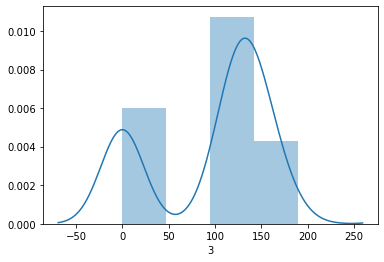

In [30]:
sns.distplot(df[3])


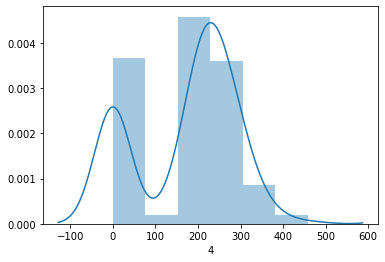

In [31]:
sns.distplot(df[4])


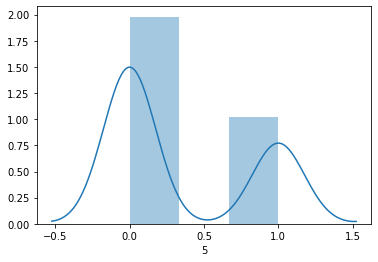

In [32]:
sns.distplot(df[5])


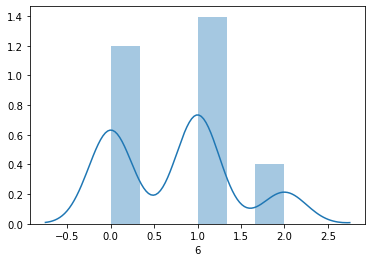

In [33]:
sns.distplot(df[6])


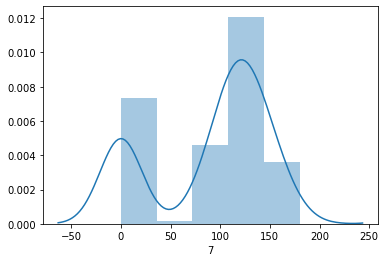

In [34]:
sns.distplot(df[7])


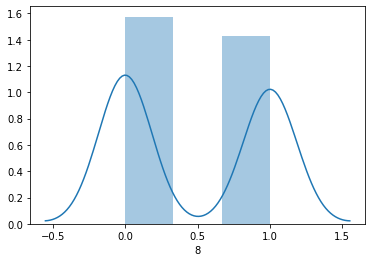

In [35]:
sns.distplot(df[8])


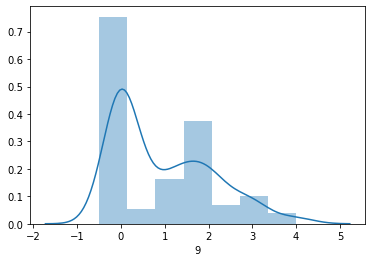

In [36]:
sns.distplot(df[9])


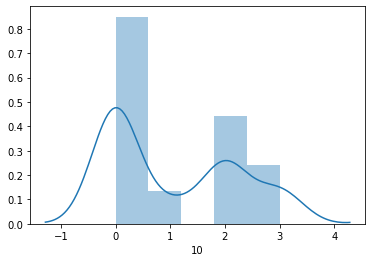

In [37]:
sns.distplot(df[10])


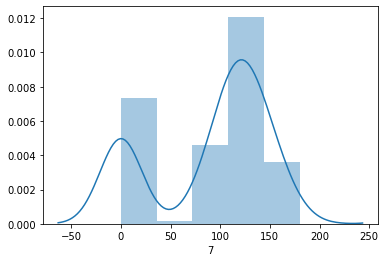

In [38]:
sns.distplot(df[7])


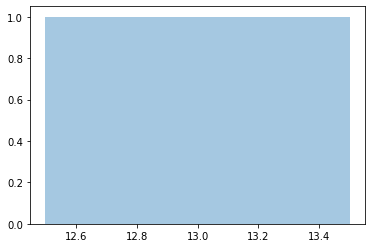

In [39]:
sns.distplot(13)


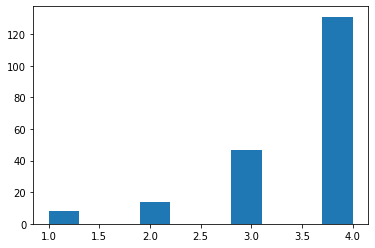

In [40]:
plt.hist(df[2])
plt.show()


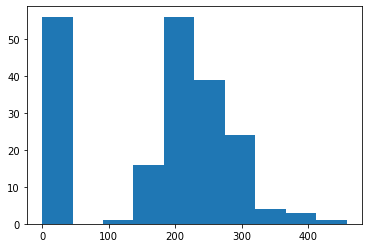

In [41]:
plt.hist(df[4])
plt.show()

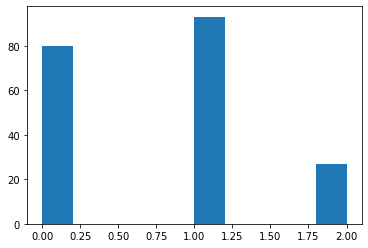

In [42]:
plt.hist(df[6])
plt.show()


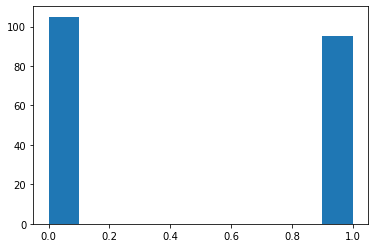

In [43]:
plt.hist(df[8])
plt.show()


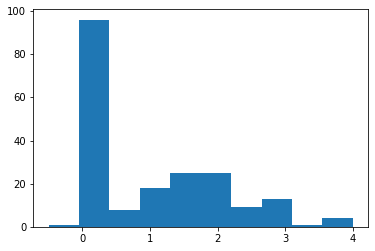

In [44]:
plt.hist(df[9])
plt.show()


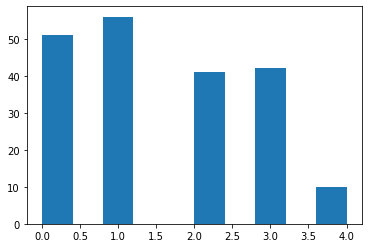

In [45]:
plt.hist(df[13])
plt.show()

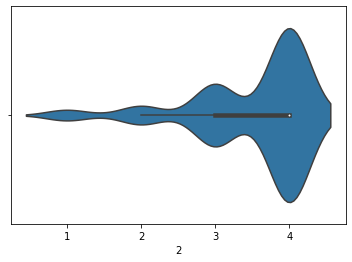

In [46]:
sns.violinplot(df[2])


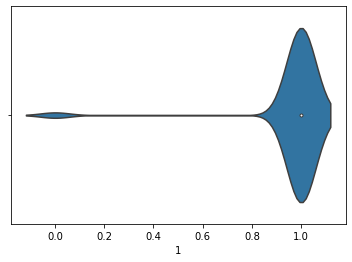

In [47]:
sns.violinplot(df[1])


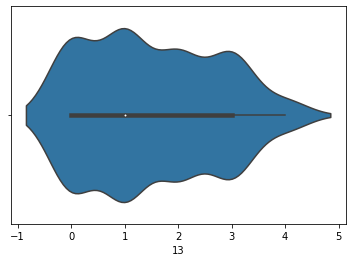

In [48]:
sns.violinplot(df[13])


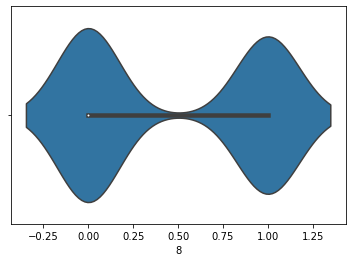

In [49]:
sns.violinplot(df[8])


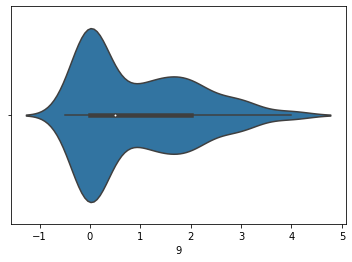

In [50]:
sns.violinplot(df[9])


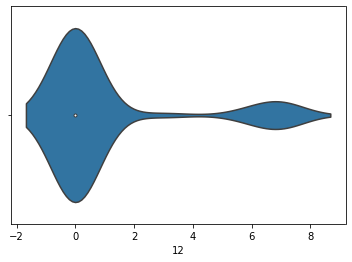

In [51]:
sns.violinplot(df[12])

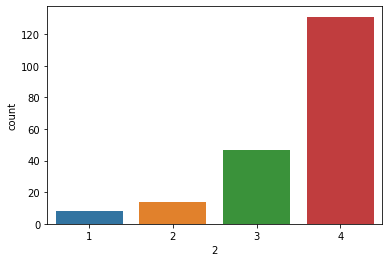

In [52]:
sns.countplot(df[2])


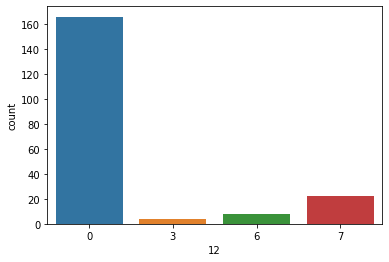

In [53]:
sns.countplot(df[12])


In [54]:
#Bivariate analysis

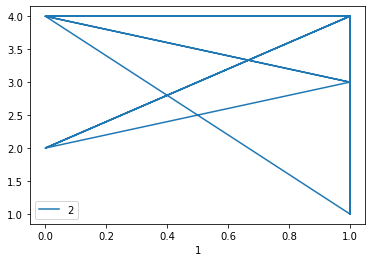

In [55]:
df.plot(x=1, y=2, kind='line')
plt.show()

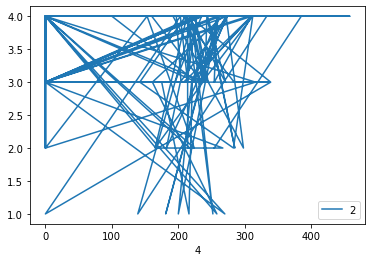

In [56]:
df.plot(x=4, y=2, kind='line')
plt.show()


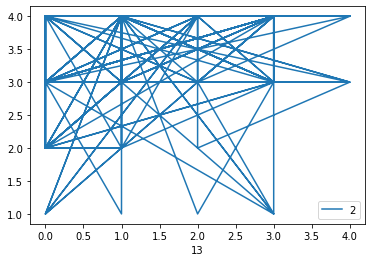

In [57]:
df.plot(x=13, y=2, kind='line')
plt.show()

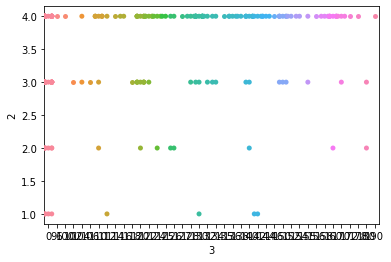

In [58]:
sns.swarmplot(x=3, y=2, data=df)
plt.show()


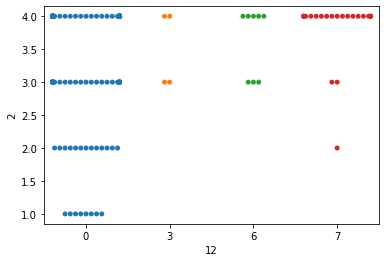

In [59]:
sns.swarmplot(x=12, y=2, data=df)
plt.show()


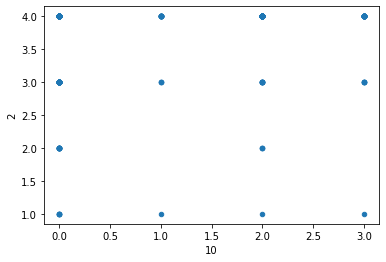

In [60]:
df.plot(x=10, y=2,  kind='scatter')
plt.show()


In [61]:
df.groupby([2])[10].count()


2
1      8
2     14
3     47
4    131
Name: 10, dtype: int64

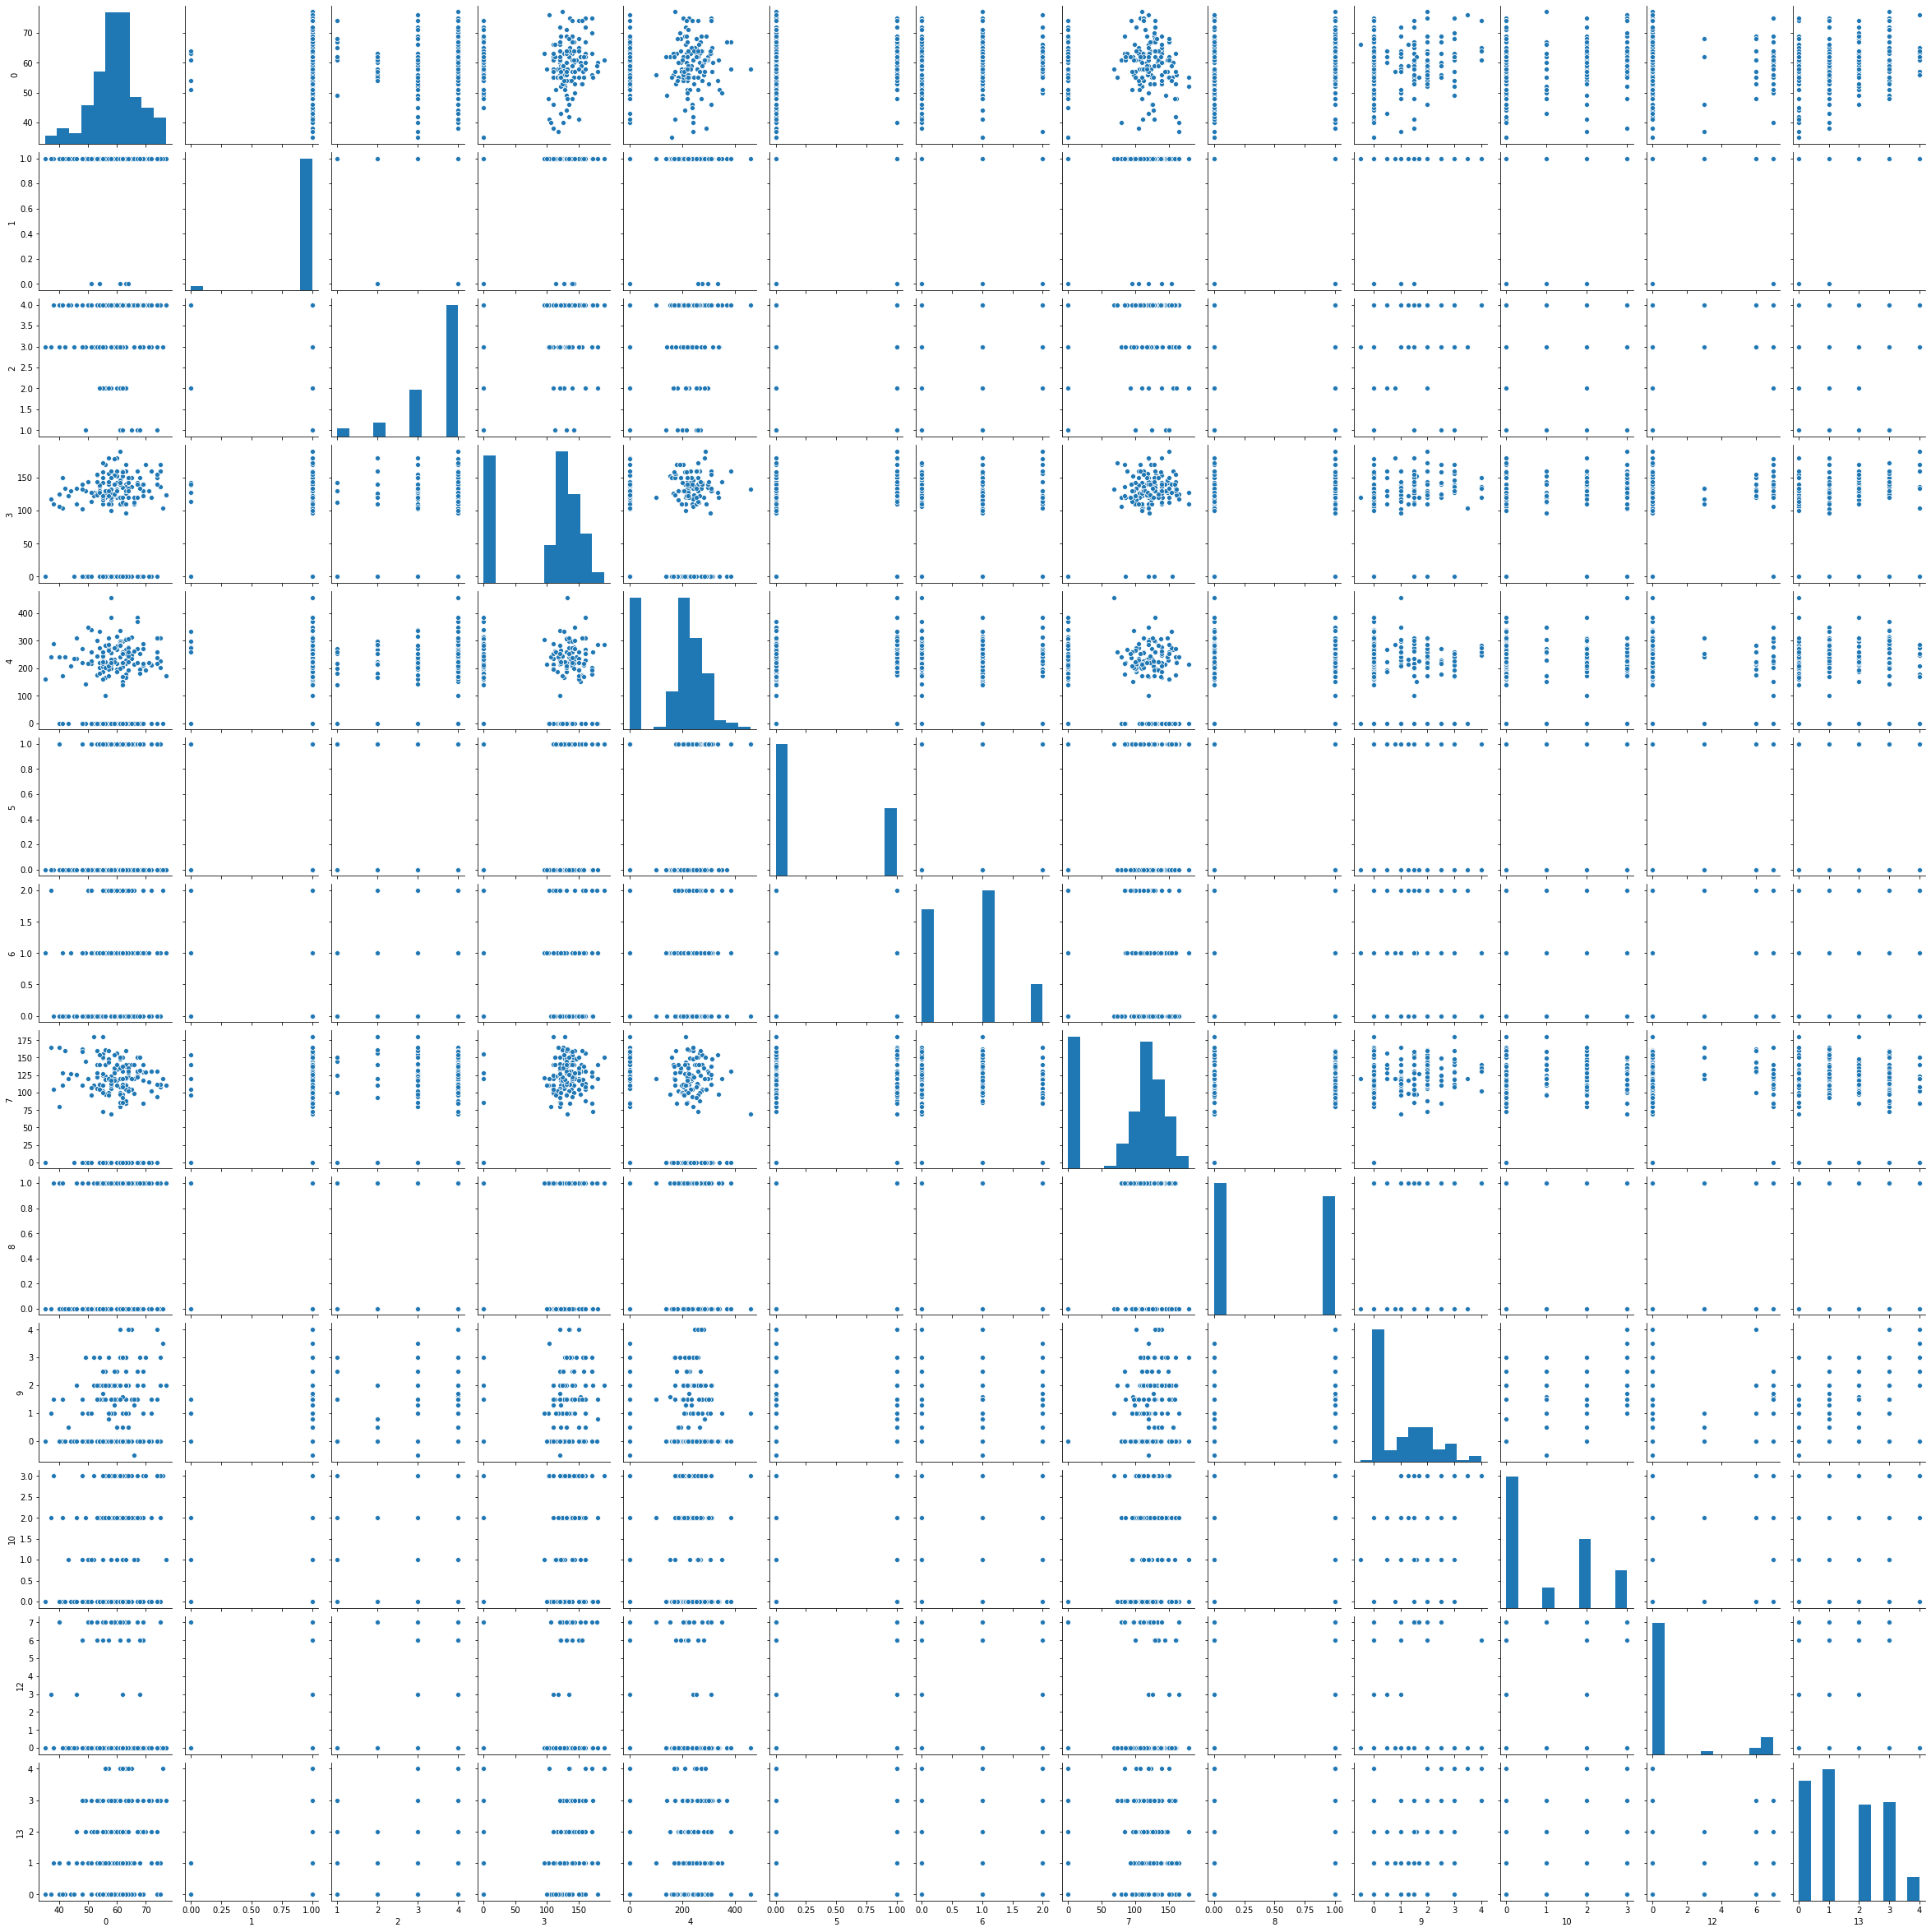

In [62]:
sns.pairplot(df)
plt.show()

In [63]:
df.skew()


0    -0.404091
1    -5.552105
2    -1.648734
3    -0.750363
4    -0.469975
5     0.680636
6     0.391463
7    -0.715818
8     0.100883
9     0.823429
10    0.468819
12    1.905183
13    0.297393
dtype: float64

In [64]:
# Remove skewness 
for col in df.columns:
    if df.skew().loc[col] > 0.55:
        df[col] = np.log1p(df[col])


In [65]:
df.skew()


0    -0.404091
1    -5.552105
2    -1.648734
3    -0.750363
4    -0.469975
5     0.680636
6     0.391463
7    -0.715818
8     0.100883
9     0.314899
10    0.468819
12    1.819829
13    0.297393
dtype: float64

In [66]:
for i in range(1, 5):
    # Remove skewness 
    for col in df.columns:
        if df.skew().loc[col] > 0.55:
            df[col] = np.log1p(df[col])


In [67]:
df.skew()

0    -0.404091
1    -5.552105
2    -1.648734
3    -0.750363
4    -0.469975
5     0.680636
6     0.391463
7    -0.715818
8     0.100883
9     0.314899
10    0.468819
12    1.776209
13    0.297393
dtype: float64

In [68]:
# Checking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(df))
print ('Before removing zscore: ', df.shape)

df_final = df.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", df_final.shape)

Before removing zscore:  (200, 13)
After removing zscore:  (185, 13)


In [69]:
# Assigning the input and output data
df_x = df_final.drop(columns = [2])
y = df_final[2]


In [70]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)


In [71]:
(x.shape, y.shape)


((185, 12), (185,))

In [72]:
x


,0,1,3,4,5,6,7,8,9,10,12,13
0,0.475730,0.0,0.678375,0.769016,-0.701381,0.370343,0.363086,1.016350,1.559914,0.793326,-0.456959,0.361398
1,-2.001589,0.0,0.517992,0.335013,-0.701381,0.370343,0.627956,-0.983913,-0.947492,-0.913248,-0.456959,-1.289434
2,0.084574,0.0,0.550069,0.411602,-0.701381,0.370343,0.857509,1.016350,0.709813,1.646613,-0.456959,0.361398
3,-0.567352,0.0,0.710451,0.496700,-0.701381,0.370343,1.016431,1.016350,1.318394,-0.059961,-0.456959,-0.464018
4,0.866885,0.0,0.197227,0.369052,1.425758,1.828076,0.133532,1.016350,0.559000,0.793326,-0.456959,-1.289434
...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.345345,0.0,0.967064,0.003128,-0.701381,0.370343,0.822193,1.016350,-0.947492,-0.913248,-0.456959,-0.464018
181,-1.740818,0.0,0.582145,1.194510,-0.701381,-1.087390,0.610298,-0.983913,-0.947492,-0.913248,1.934112,0.361398
182,-0.567352,0.0,0.389686,0.454151,1.425758,0.370343,0.151190,-0.983913,-0.947492,-0.913248,2.187123,0.361398
183,-0.176196,0.0,-1.566981,1.832750,1.425758,1.828076,-1.614607,-0.983913,-0.947492,-0.913248,-0.456959,-1.289434


In [73]:
y


0      4
1      4
2      4
3      4
4      3
      ..
193    4
194    4
197    4
198    4
199    2
Name: 2, Length: 185, dtype: int64

In [74]:
#Classification algorithm for dataset
y.unique()


array([4, 3, 2], dtype=int64)

In [75]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()



In [78]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RFC))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  47  is:  0.7837837837837838
KNeighborsClassifier()
Predicted values:  [4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3
 4 4 3 3]


Accuracy score:  0.7804878048780488


cross val score:  0.6921052631578947


[0.         0.80487805 0.97560976 1.        ] [nan nan nan nan] [5 4 3 2]
roc auc score:  nan


classification report:                precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           3       0.29      0.40      0.33         5
           4       0.88      0.88      0.88        33

    accuracy                           0.78        41
   macro avg       0.72      0.54      0.57        41
weighted avg       0.82      0.78      0.78        41



[[ 1  1  1]
 [ 0  2  3]
 [ 0  4 29]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************** SVC *********************



Max accuracy score correspon

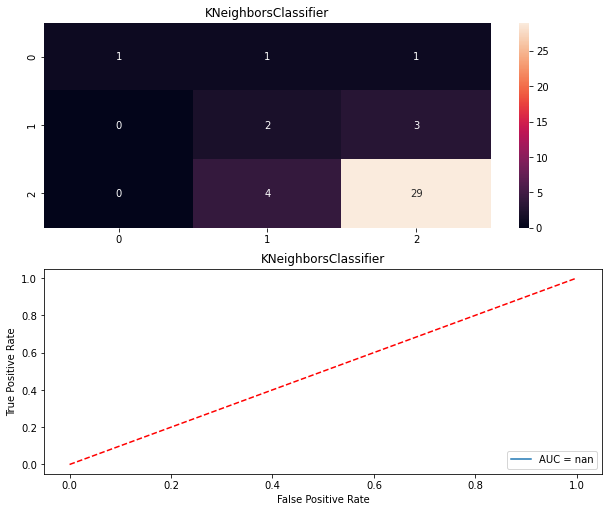

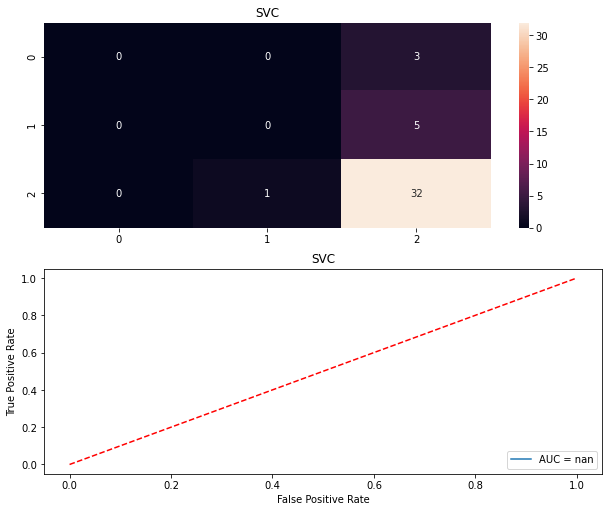

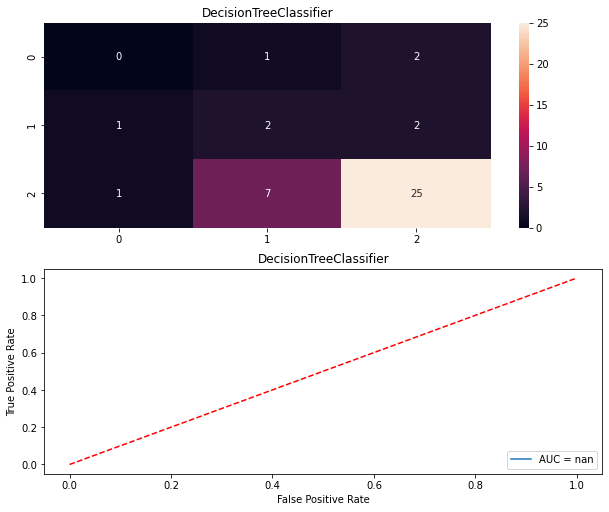

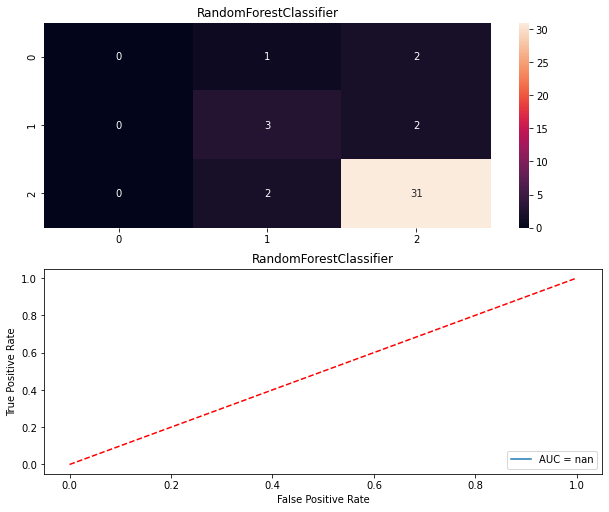

In [79]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .22)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')


In [80]:
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result


,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,78.048780,69.210526,NaN,47
1,SVC,78.048780,65.935673,NaN,47
2,DecisionTreeClassifier,65.853659,62.719298,NaN,47
3,RandomForestClassifier,82.926829,66.549708,NaN,47


In [81]:
# GridSearchCV for RandomForestClassifier
parameters = { 'n_neighbors': [3,5, 10, 12, 15, 30], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
gsc = GridSearchCV(estimator = KNN, param_grid = parameters, cv=10)
gsc.fit(x,y)
gsc.best_params_


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=47, test_size = 0.20)
rfc = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15, weights='uniform')
rfc.fit(x_train, y_train)
y_pred =  rfc.predict(x_test)
print (y_pred)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [83]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_heartdisease.csv')

accuracy score:  0.7837837837837838
Classification Report : 
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.83      0.97      0.89        30

    accuracy                           0.78        37
   macro avg       0.28      0.32      0.30        37
weighted avg       0.67      0.78      0.72        37

Confusion_matrix:  [[ 0  1  2]
 [ 0  0  4]
 [ 0  1 29]]
cross val score:  0.6970760233918128
roc auc score:  nan
AxesSubplot(0.125,0.808774;0.62x0.0712264)





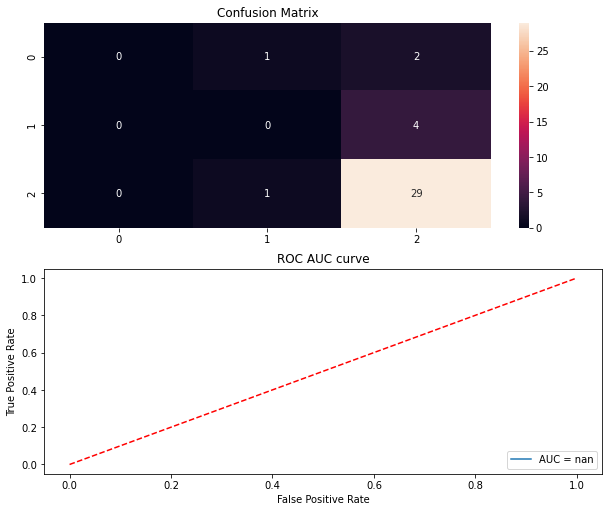

In [84]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(rfc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')


In [87]:
import joblib 
joblib.dump(rfc, 'heartdisease.pkl')


['heartdisease.pkl']

In [88]:
rfc_from_joblib = joblib.load('heartdisease.pkl')
rfc_from_joblib


KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [89]:
k=rfc_from_joblib.predict(x_test)
k

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)